<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/Stat_Maksimov_F_Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1:</b>
    
- Базово изучите датасет “happines_corruption.csv” (достаточно методов info() и describe()).
- Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
- Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

</div>

In [ ]:
df = pd.read_csv('happines_corruption.csv')
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [ ]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


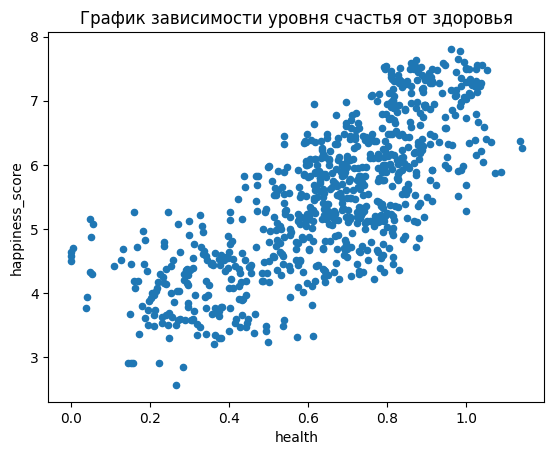

Коэффициент корреляции Пирсона:  0.7535343457737054


In [ ]:
#Есть ли взаимосвязь между уровнем счастья и здоровьем.
# Для этого используем коэффициент корреляции Пирсона и визуализируем взаимосвязь на графике.
df.plot(kind='scatter', x='health', y='happiness_score')
plt.title('График зависимости уровня счастья от здоровья')
plt.show()
print('Коэффициент корреляции Пирсона: ', df[['health','happiness_score']].corr().iloc[0, 1])

#Исходя из графика (линейная зависимость) и значения коэффициента корреляции
#(сильная положительная корреляция) можно сделать след выводы:
# - Взаимосвязь между двумя этими показателями есть
# - Чем выще значение показателя health(здоровье), тем выше значение happiness_score(уровень счастья)

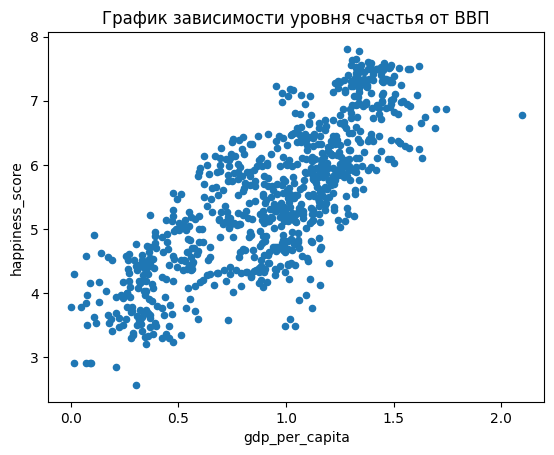

Коэффициент корреляции Пирсона:  0.7932671770333463


In [ ]:
#Верно ли, что чем выше ВВП, тем выше и уровень счастья?
df.plot(kind='scatter', x='gdp_per_capita', y='happiness_score')
plt.title('График зависимости уровня счастья от ВВП')
plt.show()
print('Коэффициент корреляции Пирсона: ', df[['gdp_per_capita','happiness_score']].corr().iloc[0, 1])

#Исходя из графика (линейная зависимость) и значения коэффициента корреляции
#(сильная положительная корреляция) можно сделать след выводы:
# - Взаимосвязь между двумя этими показателями есть
# - Чем выще значение показателя gdp_per_capita(ВВП), тем выше значение happiness_score(уровень счастья)

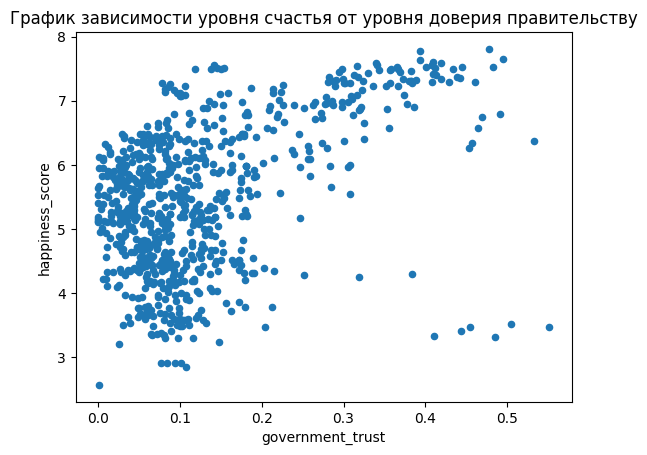

Коэффициент корреляции Пирсона:  0.4554774677093182


In [ ]:
#Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?
df.plot(kind='scatter', x='government_trust', y='happiness_score')
plt.title('График зависимости уровня счастья от уровня доверия правительству')
plt.show()
print('Коэффициент корреляции Пирсона: ', df[['government_trust','happiness_score']].corr().iloc[0, 1])

#Исходя из графика и значения коэффициента корреляции (умеренная положительная корреляция)
#можно сделать след выводы, заимосвязь между двумя этими показателями есть, хоть и не такая сильная,
#как в предыдущих примерах.

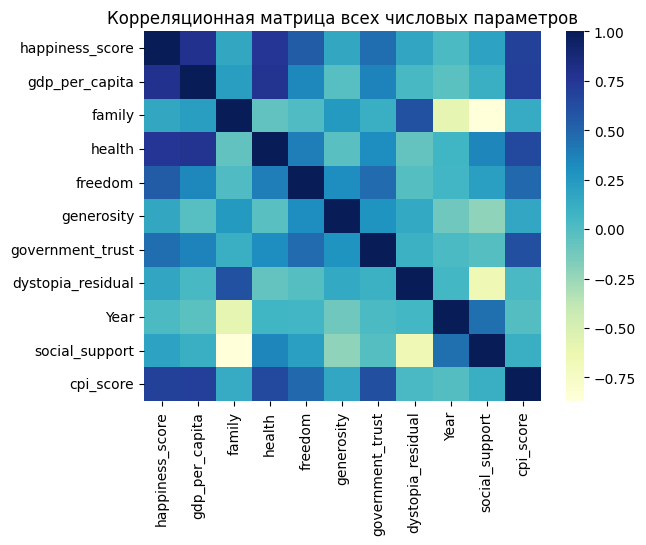

In [ ]:
num_df = df.loc[:, ~df.columns.isin(['Country', 'continent'])]
dataplot = sns.heatmap(num_df.corr(), cmap='YlGnBu')
plt.title('Корреляционная матрица всех числовых параметров')
plt.show()

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

- Оставьте только два столбца:'Temperature' и 'Sum'.
- Постройте диаграмму рассеяния.
- Постройте модель линейной регрессии для выбранных признаков.
- Рассчитайте точность модели на тестовой выборке.
- Выведите график остатков.

</div>

In [ ]:
df2 = pd.read_csv('gas_sales_data.csv')
df2.head()

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [ ]:
df2 = df2.loc[:, df2.columns.isin(['Temperature', 'Sum'])]
df2.head(10)

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248
5,23.17,551581
6,26.52,464203
7,26.26,451322
8,20.79,517377
9,15.37,694927


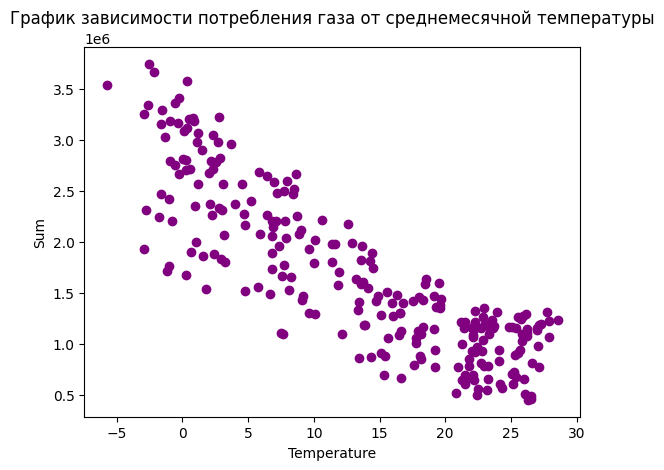

In [ ]:
#Диаграмма рассеяния
plt.scatter(df2.Temperature, df2.Sum, c='purple')
plt.xlabel('Temperature')
plt.ylabel('Sum')
plt.title('График зависимости потребления газа от среднемесячной температуры')
plt.show()

In [ ]:
#Построение линейной регрессии
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split

In [ ]:
x = df2.Temperature
y = df2.Sum
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    Sum   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.1
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.13e-49
Time:                        22:12:54   Log-Likelihood:                -2525.3
No. Observations:                 176   AIC:                             5055.
Df Residuals:                     174   BIC:                             5061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.572e+06   5.39e+04     47.695      

In [ ]:
print(f"Фукнция линейной регрессии: y = {res.params[1]:.2f}x + {res.params[0]:.2f}")
#Оценка точности
print('------------------------')
print('R2: ', res.rsquared)
print(model.score())

Фукнция линейной регрессии: y = -69183.68x + 2571665.57
------------------------
R2:  0.7157287338799033


In [ ]:
#предсказанные значения
y_pred = res.predict(x_const)
y_pred

239    2.382102e+06
84     2.486570e+06
29     1.038555e+06
168    2.534306e+06
167    2.492796e+06
           ...     
106    1.997441e+06
14     2.175243e+06
92     1.064153e+06
179    2.664372e+06
102    7.943367e+05
Length: 176, dtype: float64

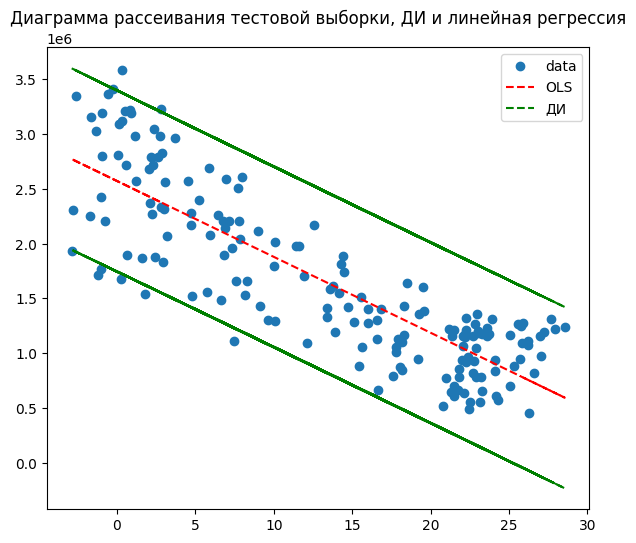

In [ ]:
#Построим диаграмму рассеивания тестовой выборки, доверительный интервал и линейную регрессию
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = plt.subplots(figsize=(7,6))
ax.plot(x_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(x_const.iloc[:, 1], res.fittedvalues, 'r--', label='OLS')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--', label='ДИ')
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.legend(loc='best')
plt.title('Диаграмма рассеивания тестовой выборки, ДИ и линейная регрессия')
plt.show()

Text(0.5, 1.0, 'График остатков ')

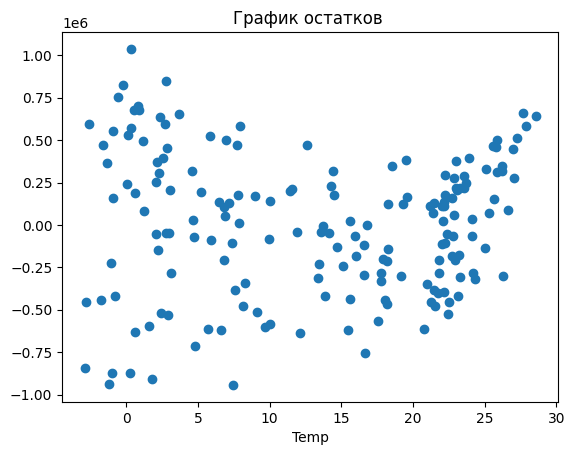

In [ ]:
plt.scatter(x_const.iloc[:, 1], res.resid)
plt.xlabel('Temp')
plt.title('График остатков ')